In [127]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import random
import numpy as np

In [128]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

selection_img = []
selection_labels = []

n = 2**10

i=0
while i < n:
    p = random.randint(50, 40000)
    selection_img.append(train_images[p])
    selection_labels.append(train_labels[p])
    i += 1
assert len(selection_img) == n

selection_img = np.array(selection_img)
selection_labels = np.array(selection_labels)
assert len(selection_img) == n
print(f"test_images: {len(test_images)}")
print(f"selection images: {len(selection_img)}")

test_images: 10000
selection images: 1024


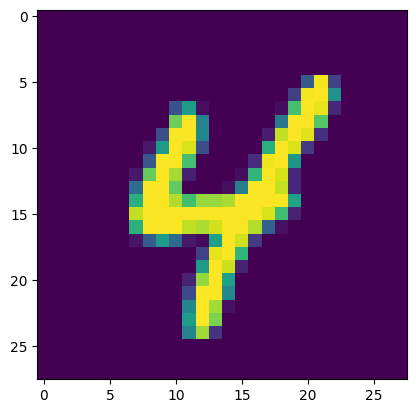

In [129]:
plt.imshow(selection_img[0])

In [130]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [131]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(selection_img, selection_labels, epochs=20, batch_size= 2**11, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8437 - val_loss: 0.7752
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.9141 - loss: 0.2693 - val_accuracy: 0.9063 - val_loss: 0.4809
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.9863 - loss: 0.0455 - val_accuracy: 0.8702 - val_loss: 0.7430
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.9551 - loss: 0.1380 - val_accuracy: 0.8800 - val_loss: 0.6591
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.9756 - loss: 0.0863 - val_accuracy: 0.8910 - val_loss: 0.5671
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.9854 - loss: 0.0454 - val_accuracy: 0.8996 - val_loss: 0.4960
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.9922 - loss: 0.0204 - val_accuracy: 0.9095 - val_loss: 0.4452
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.9990 - loss: 0.0117 - val_accuracy: 0.9109 - val_loss: 0.

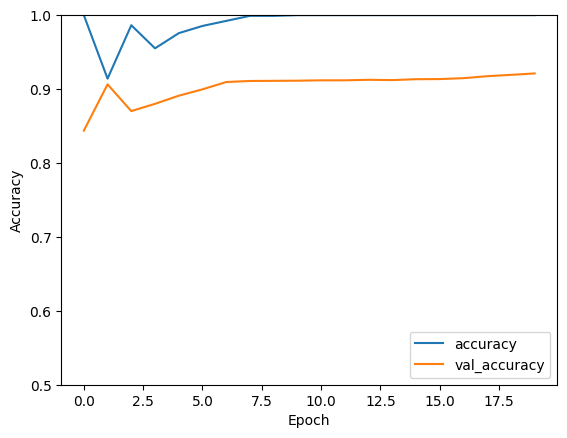

In [136]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)